In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import nfode
import torch.jit
device = torch.device('cpu')

# Define the moving average function
def moving_average(data, window_size):
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')

# Main program
if __name__ == "__main__":
    # Load data
    data = np.load('data.npz')
    t_data = data['t_data']
    x_data = data['x_data_noised']

    # Apply moving average to each row
    window_size = 10  # Adjust window size as needed
    x_data_ma = np.array([moving_average(row, window_size) for row in x_data])

    # Convert to PyTorch Tensor
    device = torch.device('cpu')  # or 'cuda' if you have a GPU
    x_tensor = torch.tensor(x_data_ma, dtype=torch.float32).requires_grad_(True).to(device)
    t_tensor = torch.tensor(t_data[9:], dtype=torch.float32).unsqueeze(1).requires_grad_(True).to(device)

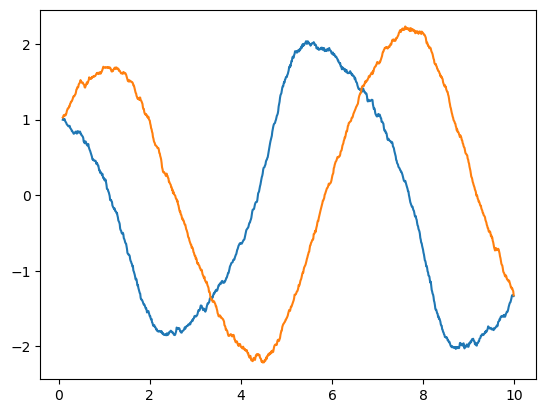

In [22]:
x_np = x_tensor.detach().numpy()
t_np = t_tensor.detach().numpy()
plt.plot(t_np, x_np[0, :])
plt.plot(t_np, x_np[1, :])

In [23]:
model = nfode.ODEModel()
nfode.initialize_params_uniform(model)
#model = torch.load('neuralode_model.pt')
model, loss_curve, x_preds, real_loss_curve = nfode.train(model, t_tensor, x_tensor, device, num_epochs=1200)
x_preds = x_preds.detach().numpy()

1 100 / 1200 21:02:19 cpu real loss: 3.3065462 derivate loss: 3.1656792
1 200 / 1200 21:03:24 cpu real loss: 1.2085066 derivate loss: 2.6768525
1 300 / 1200 21:04:31 cpu real loss: 0.46742713 derivate loss: 2.3364813
1 400 / 1200 21:05:41 cpu real loss: 0.011605366 derivate loss: 2.1932485
1 500 / 1200 21:06:51 cpu real loss: 0.00926218 derivate loss: 2.185282
1 600 / 1200 21:07:59 cpu real loss: 0.007860577 derivate loss: 2.1842382
1 700 / 1200 21:09:06 cpu real loss: 0.004194457 derivate loss: 2.1772687
1 800 / 1200 21:10:14 cpu real loss: 0.0012032235 derivate loss: 2.1690876
1 900 / 1200 21:11:22 cpu real loss: 0.0010494756 derivate loss: 2.1666336
1 1000 / 1200 21:12:32 cpu real loss: 0.0010014307 derivate loss: 2.1664245
1 1100 / 1200 21:13:37 cpu real loss: 0.0010394577 derivate loss: 2.1658936
1 1200 / 1200 21:14:42 cpu real loss: 0.0011402227 derivate loss: 2.1656737


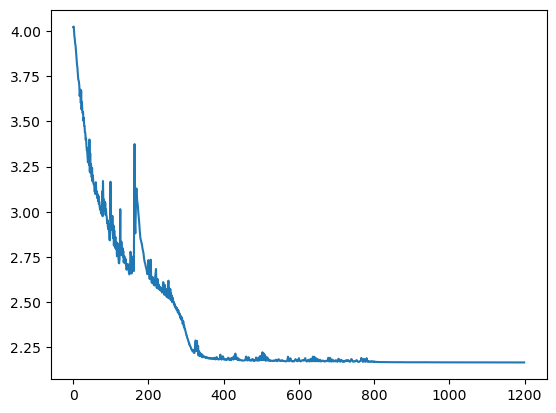

In [24]:
plt.plot(loss_curve)

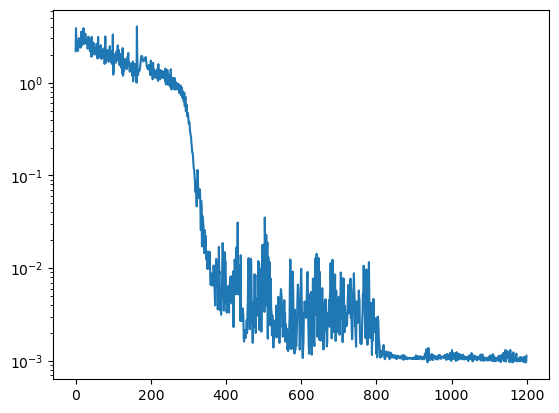

In [25]:
plt.plot(real_loss_curve)
plt.yscale('log')

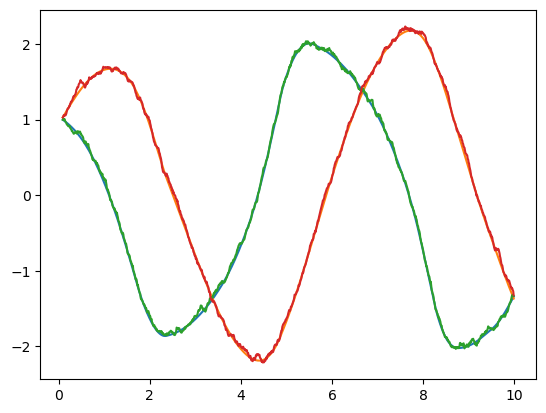

In [26]:
plt.plot(t_data[9:], x_preds)
plt.plot(t_data[9:], x_np.T)

In [27]:
torch.save(model, 'model.pt')

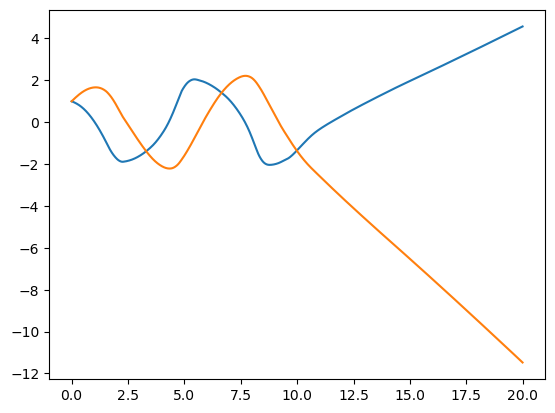

In [28]:
dt = 0.01
model = torch.load('model.pt')
data_test = np.load('data_test.npz')
t_test = data_test['t_data']
x_test = data_test['x_data']
x_test_preds = nfode.predict(model, t_test, x_test.T, dt)
plt.plot(t_test, x_test_preds)